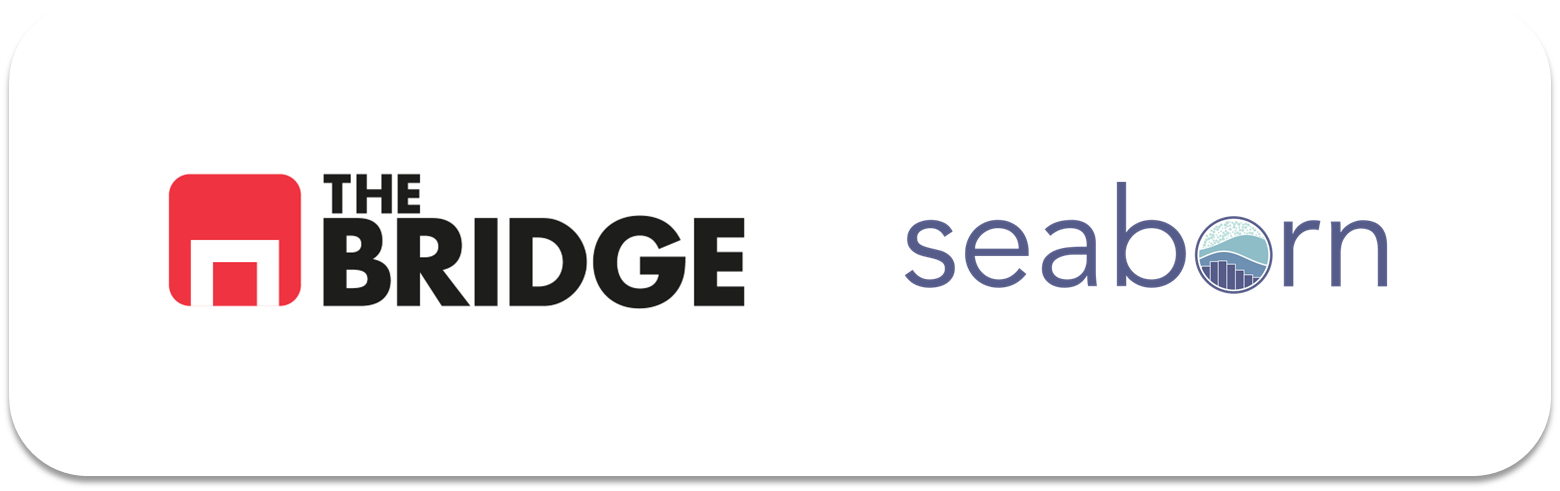

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Configurar el estilo
sns.set_theme(style="white")

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [3]:
df = pd.read_csv('./data/california_cities.csv')
df = df.dropna()
df.sample(5)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
169,169,HawaiianGardens,33.828611,-118.073611,10.0,33.0,14254,0.956,0.946,0.010,2.477,2.450,0.027,1.09
243,243,Lynwood,33.924722,-118.201944,28.0,92.0,69772,4.840,4.840,0.000,12.536,12.536,0.000,0.00
357,357,Roseville,38.752500,-121.289444,50.0,164.0,127323,36.223,36.222,0.001,93.817,93.814,0.003,0.00
353,353,RohnertPark,38.347222,-122.695278,32.0,105.0,40971,7.008,7.003,0.005,18.149,18.136,0.013,0.07
308,308,Paradise,39.759722,-121.621389,542.0,1778.0,26249,18.322,18.308,0.014,47.455,47.418,0.037,0.08


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

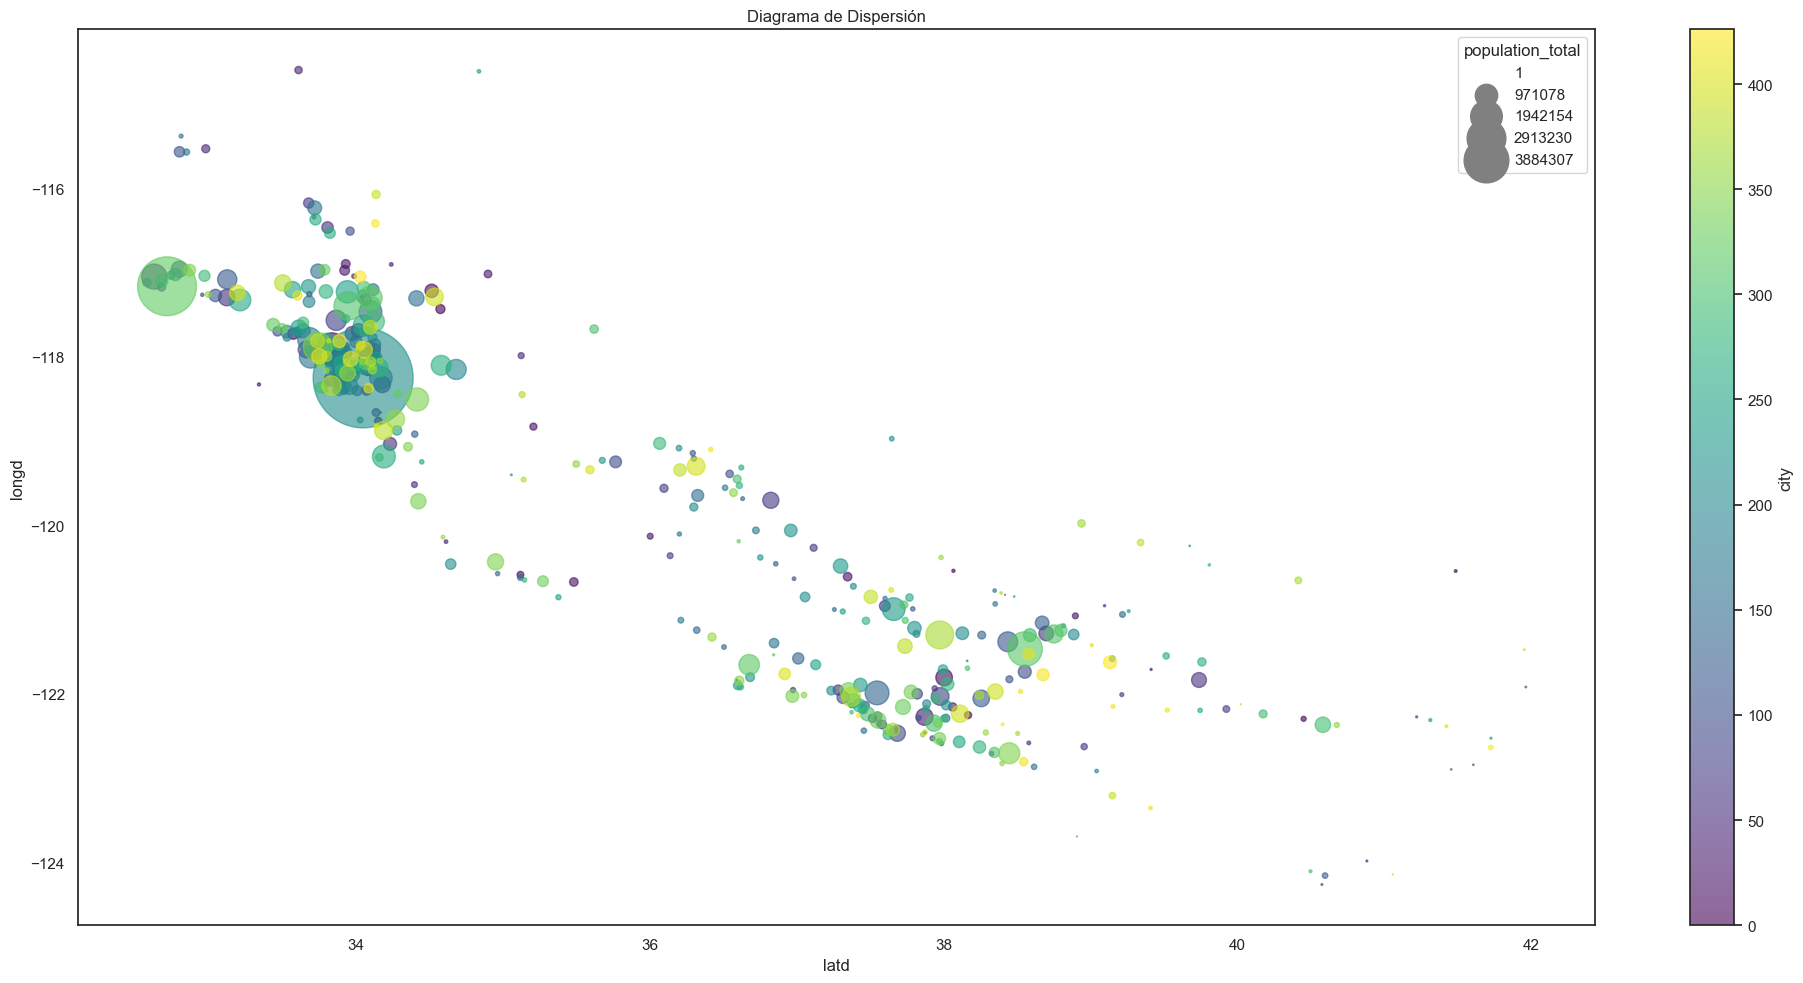

In [4]:
def scatter_plot(df, num_col_x, num_col_y, cat_col=None, size=None, scale=1, legend_type='both'):
	fig, ax = plt.subplots(figsize=(20, 10))
	
	# Configurar tamaños
	if isinstance(size, str):  # Si el tamaño es una columna
		if size in df.columns:
			sizes = df[size] * scale
		else:
			raise ValueError(f"La columna '{size}' no existe en el DataFrame.")
	else:  # Si es un número fijo o None
		sizes = size if size else 20

	# Configurar colores
	color_mapping = None
	if cat_col and cat_col in df.columns:
		categories = df[cat_col].astype('category').cat.codes
		color_mapping = ax.scatter(
			df[num_col_x], df[num_col_y], 
			c=categories, s=sizes, cmap='viridis', alpha=0.6
		)
	else:
		ax.scatter(df[num_col_x], df[num_col_y], s=sizes, alpha=0.6)

	# Etiquetas de los ejes
	ax.set_xlabel(num_col_x)
	ax.set_ylabel(num_col_y)
	ax.set_title("Diagrama de Dispersión")

	# Manejo de leyendas
	if legend_type == 'both' or legend_type == 'colorbar':
		if cat_col and color_mapping:
			fig.colorbar(color_mapping, ax=ax, label=cat_col)
	
	if legend_type == 'both' or legend_type == 'size':
		if isinstance(size, str):
			min_size = df[size].min()
			max_size = df[size].max()
			size_values = np.linspace(min_size, max_size, 5)
			handles = [
				ax.scatter([], [], s=v * scale / 5, label=f'{v:.0f}', color='gray') 
				for v in size_values
			]
			
			ax.legend(
				handles=handles,
				title=size,
				loc='upper right',
				frameon=True
			)

	plt.tight_layout()
	plt.show()

scatter_plot(
	df, 
	num_col_x='latd', 
	num_col_y='longd', 
	cat_col='city', 
	size='population_total', 
	scale=1/750, 
	legend_type='both'
)


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

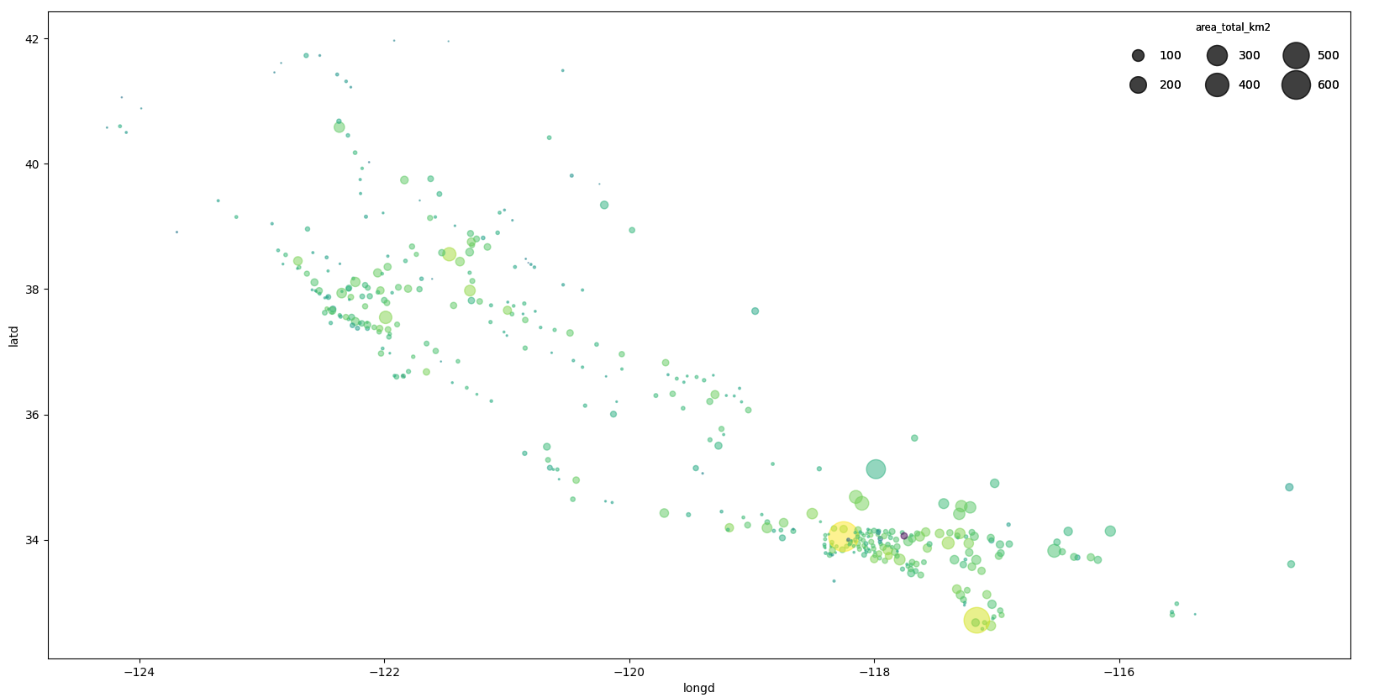

In [5]:
# Crear la nueva columna con el logaritmo decimal de la población
df['log_poblacion'] = np.log10(df['population_total'])

In [6]:
print(sns.axes_style())

{'axes.facecolor': 'white', 'axes.edgecolor': '.15', 'axes.grid': False, 'axes.axisbelow': True, 'axes.labelcolor': '.15', 'figure.facecolor': 'white', 'grid.color': '.8', 'grid.linestyle': '-', 'text.color': '.15', 'xtick.color': '.15', 'ytick.color': '.15', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': <CapStyle.round: 'round'>, 'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'image.cmap': 'rocket', 'font.family': ['sans-serif'], 'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'], 'xtick.bottom': False, 'xtick.top': False, 'ytick.left': False, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}


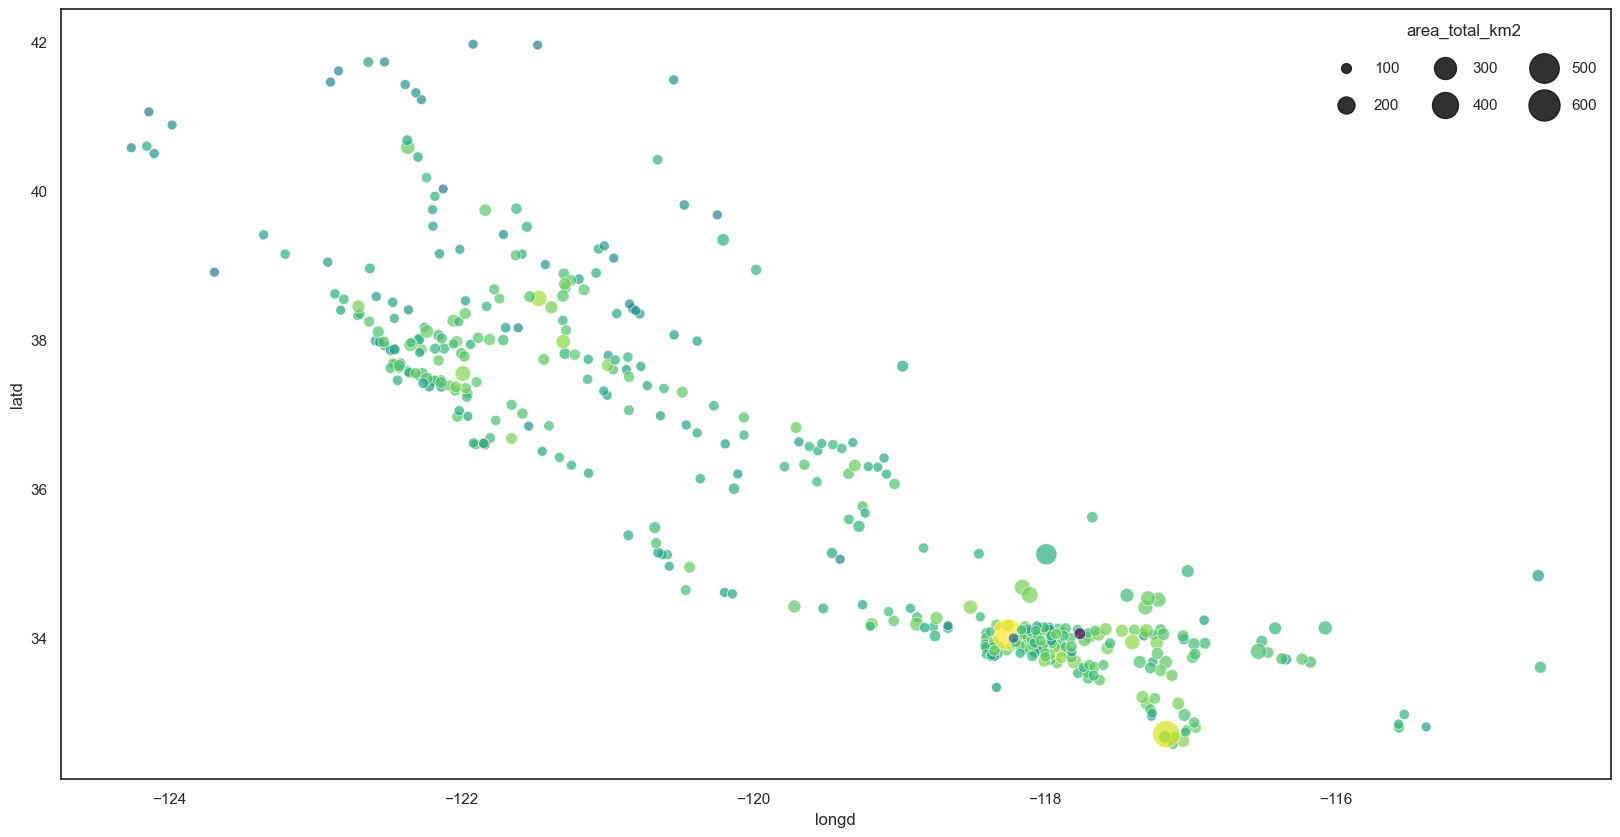

In [7]:
# Crear el gráfico de dispersión
plt.figure(figsize=(20, 10))  # Ajustar el tamaño del gráfico para mayor claridad
ax = plt.gca()  # Obtener el eje actual

scatter = sns.scatterplot(
    data=df,
    x='longd',
    y='latd',
    size='area_total_km2',
    hue='log_poblacion',
    palette='viridis',
    sizes=(50, 500),
    alpha=0.7,
    legend=False
)

# Crear leyenda personalizada de tamaño
size_labels = [100, 200, 300, 400, 500, 600]
size_values = [50, 150, 250, 350, 450, 500]  # Relación entre tamaños y valores reales
for size, label in zip(size_values, size_labels):
    plt.scatter([], [], s=size, c='k', alpha=.9, label=f"{label}")

# Agregar la leyenda personalizada
plt.legend(
    title="area_total_km2",
    loc='upper right',
    frameon=False,
    ncol=3,
    labelspacing=1.5
)

# Mostrar gráfico
plt.show()


## #2: Presentación
En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1. El titanic fue un accidente con una tasa de mortalidad alta.  
2. En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3. ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4. ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5. Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas. 

In [8]:
# Cargar datos del Titanic
df = pd.read_csv('./data/titanic.csv')
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
716,1,1,female,38.0,0,0,227.5250,C,First,woman,False,C,Cherbourg,yes,True
873,0,3,male,47.0,0,0,9.0000,S,Third,man,True,NaN,Southampton,no,True
139,0,1,male,24.0,0,0,79.2000,C,First,man,True,B,Cherbourg,no,True
792,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
125,1,3,male,12.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False


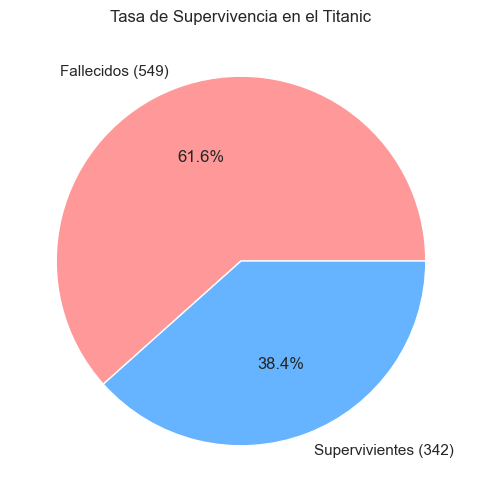

In [9]:
# Tasa de supervivencia
survival_counts = df['survived'].value_counts()
survival_labels = ['Fallecidos', 'Supervivientes']

# Gráfico de pastel con valores absolutos y porcentajes
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=[f'{label} ({count})' for label, count in zip(survival_labels, survival_counts)],
        autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Tasa de Supervivencia en el Titanic')
plt.show()

In [10]:
temp['survived_label'] = temp['survived'].map({0: 'Fallecido', 1: 'Superviviente'})

plt.figure(figsize=(8,6))
sns.barplot(data=temp, x='who', y='proportion', hue='survived_label', palette='Set2')

plt.title('Proporción de Supervivencia por Categoría (Mujeres, Hombres, Niños)')
plt.xlabel('Categoría')
plt.ylabel('Proporción')
plt.legend(title='Supervivencia')

# Ajustar el eje Y para mostrar en porcentaje si se desea
plt.gca().set_yticklabels(['{:.0%}'.format(y) for y in plt.gca().get_yticks()])

plt.show()

NameError: name 'temp' is not defined

In [ ]:
# Crear una tabla con valores absolutos
class_survival_counts = df.groupby(['class', 'survived']).size().unstack(fill_value=0)

# Calcular valores relativos
class_totals = class_survival_counts.sum(axis=1)
class_survival_percent = class_survival_counts.div(class_totals, axis=0) * 100

# Gráfico de barras apiladas con valores absolutos y porcentajes
ax = class_survival_counts.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], figsize=(10, 6))

# Añadir anotaciones de porcentajes
for i, (total, row) in enumerate(zip(class_totals, class_survival_percent.values)):
    for j, value in enumerate(row):
        ax.text(i, class_survival_counts.iloc[i, :j].sum() + class_survival_counts.iloc[i, j] / 2, 
                f'{class_survival_counts.iloc[i, j]} ({value:.1f}%)', 
                ha='center', va='center', fontsize=10, color='white')

plt.title('Supervivencia por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.legend(title='Supervivencia', labels=['Fallecido', 'Superviviente'])
plt.show()

In [ ]:
# Calculamos la tasa de supervivencia por categoría (woman, child)
survival_rate_who = (
    df[df['who'].isin(['woman', 'child'])]
    .groupby('who')['survived']
    .mean()
    .mul(100)
    .reset_index(name='survived_percentage')
)

plt.figure(figsize=(6, 4))

# Dibujamos barras horizontales con Seaborn
sns.barplot(
    data=survival_rate_who,
    x='survived_percentage',
    y='who',
    palette=['#ff7f0e', '#1f77b4'],
    alpha=0.8
)

# Etiquetas y título
plt.xlabel('Tasa de Supervivencia (%)')
plt.ylabel('Categoría (Quién)')
plt.title('Tasa de Supervivencia: Mujeres vs Niños')
plt.xlim(0, 100)

# Añadimos etiquetas de texto directamente en las barras
for index, row in survival_rate_who.iterrows():
    plt.text(row['survived_percentage'] + 2, index, f"{row['survived_percentage']:.1f}%", va='center')

# Grilla vertical para referencia
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Ajuste final con la leyenda personalizada
plt.figure(figsize=(12, 7))

# Crear scatterplot
sns.scatterplot(
    x='age',
    y='fare',
    hue='embark_town',
    style='alive',
    markers={"yes": "o", "no": "X"},
    size='fare',
    sizes=(50, 300),
    alpha=0.8,
    data=df,
    palette='Set2'
)

# Líneas horizontales para tarifas
plt.axhline(50, color='blue', linestyle='--', alpha=0.7, label='Tarifa promedio (50)')
plt.axhline(100, color='green', linestyle='--', alpha=0.7, label='Tarifa alta (100)')

# Personalizar ejes
plt.title('Tarifa vs Edad según Puerto de Embarque', fontsize=18, fontweight='bold')
plt.xlabel('Edad (años)', fontsize=14)
plt.ylabel('Tarifa (libras)', fontsize=14)

# Crear la leyenda personalizada
from matplotlib.lines import Line2D

# Elementos personalizados
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Southampton', markerfacecolor='lightgreen', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Cherbourg', markerfacecolor='coral', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Queenstown', markerfacecolor='skyblue', markersize=8),
    Line2D([0], [0], marker='o', color='black', linestyle='', label='Survived', markersize=6),
    Line2D([0], [0], marker='X', color='black', linestyle='', label='Perished', markersize=6),
    Line2D([0], [0], color='blue', linestyle='--', lw=2, label='Tarifa promedio (50)'),
    Line2D([0], [0], color='green', linestyle='--', lw=2, label='Tarifa alta (100)')
]

# Construcción de la leyenda
plt.legend(
    handles=legend_elements,
    title='Puerto y Estado\n\nAlive',
    loc='upper right',
    fontsize=11,
    title_fontsize=12,
    markerscale=1.3
)

# Ajustar rejilla y diseño
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()